In [1]:
!pip install scikit-learn

## Loading the dataset

Didving the dataset into X,y. X represents the independent variables and y represents the labels or dependent variable. The idea is to train a model which predicts the values of y given X

In [2]:
from sklearn.datasets import fetch_california_housing
X, y=fetch_california_housing(return_X_y=True)

## Training a KNN model

In [3]:
from sklearn.neighbors import KNeighborsRegressor
model_KNN=KNeighborsRegressor()
model_KNN.fit(X,y)


KNeighborsRegressor()

In [4]:
#Predict with trained KNN model
pred_KNN=model_KNN.predict(X)
pred_KNN

array([2.826802, 2.1594  , 3.650404, ..., 1.2882  , 1.4418  , 1.7342  ])

### Training a Linear Regression model

In [5]:
from sklearn.linear_model import LinearRegression
model_LR=LinearRegression()
model_LR.fit(X,y)


LinearRegression()

In [6]:
#Predict with trained Linear Regression model
pred_LR=model_LR.predict(X)
pred_LR

array([4.13164983, 3.97660644, 3.67657094, ..., 0.17125141, 0.31910524,
       0.51580363])

### Evaluating predicted values with original values

Text(0, 0.5, 'Actual Value')

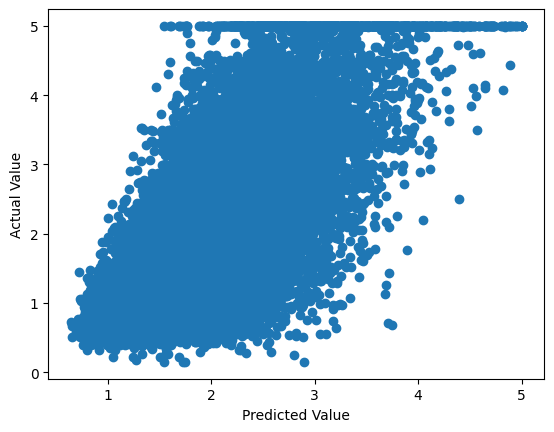

In [7]:
import matplotlib.pyplot as plt
plt.scatter(pred_KNN,y)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

We can notice that the prediction is not uniform for all price ranges. It order to handle this, we will scale the data data so we are dealing with an even playing field. As KNN is sensitive to scales, this normalization will help the model to predict better

### Scale

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [9]:
pipe = Pipeline([("scale", StandardScaler()), ("model", KNeighborsRegressor())])

In [10]:
pipe.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsRegressor())])

In [11]:
pred_pipe=pipe.predict(X)
pred_pipe

array([4.661406, 4.3096  , 4.236604, ..., 0.7748  , 0.7888  , 1.0224  ])

Text(0, 0.5, 'Actual Value')

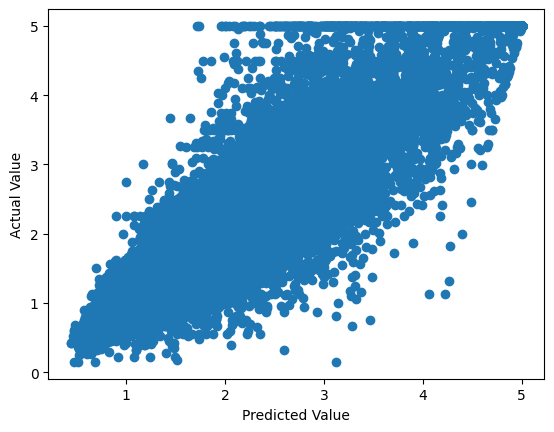

In [12]:
plt.scatter(pred_pipe,y)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

We can notice that the above plot has better predictions and has lesser noise

### Hyperparameter Update

Text(0, 0.5, 'Actual Value')

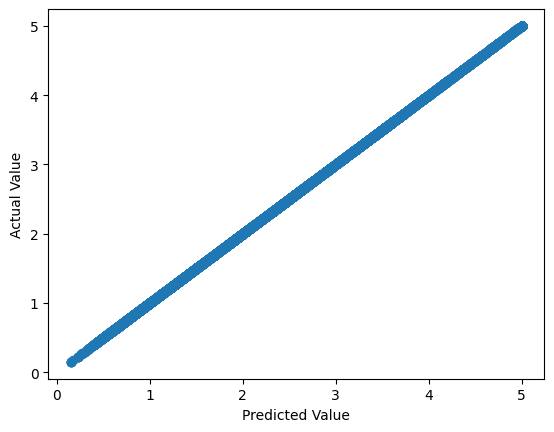

In [13]:
#Changing the number of neighbours
pipe=Pipeline([("scale", StandardScaler()),("model",KNeighborsRegressor(n_neighbors=1))])
pipe.fit(X,y)
pred_pipe=pipe.predict(X)
plt.scatter(pred_pipe,y)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

If we only select 1 neighbour, it only considers only 1 nearest point to calculate predict. We are also not using the same datapoints used for training to also predict. This may lead to potential data leakage and our model may not perform with similar accuracy when deployed in production or when applied to unseen data.

### Grid Search

In [14]:
pipe=Pipeline([("scale", StandardScaler()),("model",KNeighborsRegressor())])
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [15]:
from sklearn.model_selection import GridSearchCV
model_gs=GridSearchCV(estimator=pipe,param_grid={'model__n_neighbors':[1,2,3,4,5,6,7,8,9,20]}, cv=3)
model_gs.fit(X,y);
results=model_gs.cv_results_

In [16]:
#Saving grid search results in a pandas dataframe for better visibilty
import pandas as pd
df=pd.DataFrame(results)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.036381,0.006350,0.836465,0.159736,1,{'model__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,10
1,0.035653,0.007077,0.928964,0.067359,2,{'model__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,9
2,0.047358,0.020505,1.098507,0.118974,3,{'model__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,8
3,0.048991,0.011959,1.835592,0.902864,4,{'model__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,7
4,0.080042,0.045048,1.390736,0.142484,5,{'model__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,6
5,0.031985,0.001972,1.052296,0.254487,6,{'model__n_neighbors': 6},0.558435,0.586185,0.521134,0.555251,0.026652,5
6,0.018563,0.000031,0.569567,0.040268,7,{'model__n_neighbors': 7},0.564207,0.590509,0.525223,0.559979,0.026820,4
7,0.029032,0.006520,0.872088,0.144928,8,{'model__n_neighbors': 8},0.568637,0.593942,0.529337,0.563972,0.026580,3
8,0.022701,0.006136,0.650358,0.051779,9,{'model__n_neighbors': 9},0.571972,0.594863,0.529928,0.565588,0.026891,2
9,0.018079,0.000166,0.733517,0.044144,20,{'model__n_neighbors': 20},0.580342,0.601097,0.533867,0.571768,0.028108,1


From the above results we can view test scores for each value of n(nearest neighbours) how the model has performed. This allows us to make better judgements on model training and hyperparameter tuning.

However, apart from hyperparameter tuning, we need to also make it a point to examine the dataset closely and understand the relevance of each feature and how it impacts the prediction process.